# 为什么选择自然语言？

## 1. 自然语言是（几乎）通用的标签 (y) 和任务 (z) 编码器

语言最大的优势在于它能够在统一的空间中表示各种各样的音乐信息检索（MIR）标签和任务。此外，随着语言模型的进步，这个统一空间不再是正交的（如 one-hot 编码），而是从预训练语言模型所使用的大规模语料库中学习到了相对语义。这使得音乐概念和任务能够获得更加细致和富有上下文的表示。

- 这种灵活表示 `tasks`（任务）和 `labels`（标签）的能力，使得音乐-语言模型能够同时理解更广泛的任务，而不是局限于单一任务，从而成为更具泛化能力的模型。

- 得益于这种能力，音乐-语言模型能够解决词汇表外（out-of-vocabulary）问题并处理新类别。


虽然我们将在第2章中详细学习语言模型的发展，但让我们先通过一个预训练语言模型的示例来简要了解上述优势。
我们可以通过 T-SNE 可视化来观察：各种模型的标签和任务都可以用语言来表达，并且它们存在于同一个空间中。

In [3]:
import warnings
warnings.filterwarnings('ignore')
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/sentence-t5-base')
y = ["rock music", "rap music", "classical music",  "130bpm", "120bpm" ,"55bpm", "piano", "electronic guitar", "acoustic guitar", "aggressive", "happy", "excited", "bright sound", "dark sound", "soft sound"]
z = ['genre', 'tempo', 'instrument', 'mood', 'timbre']
with torch.no_grad():
    embeddings = model.encode(y + z)
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

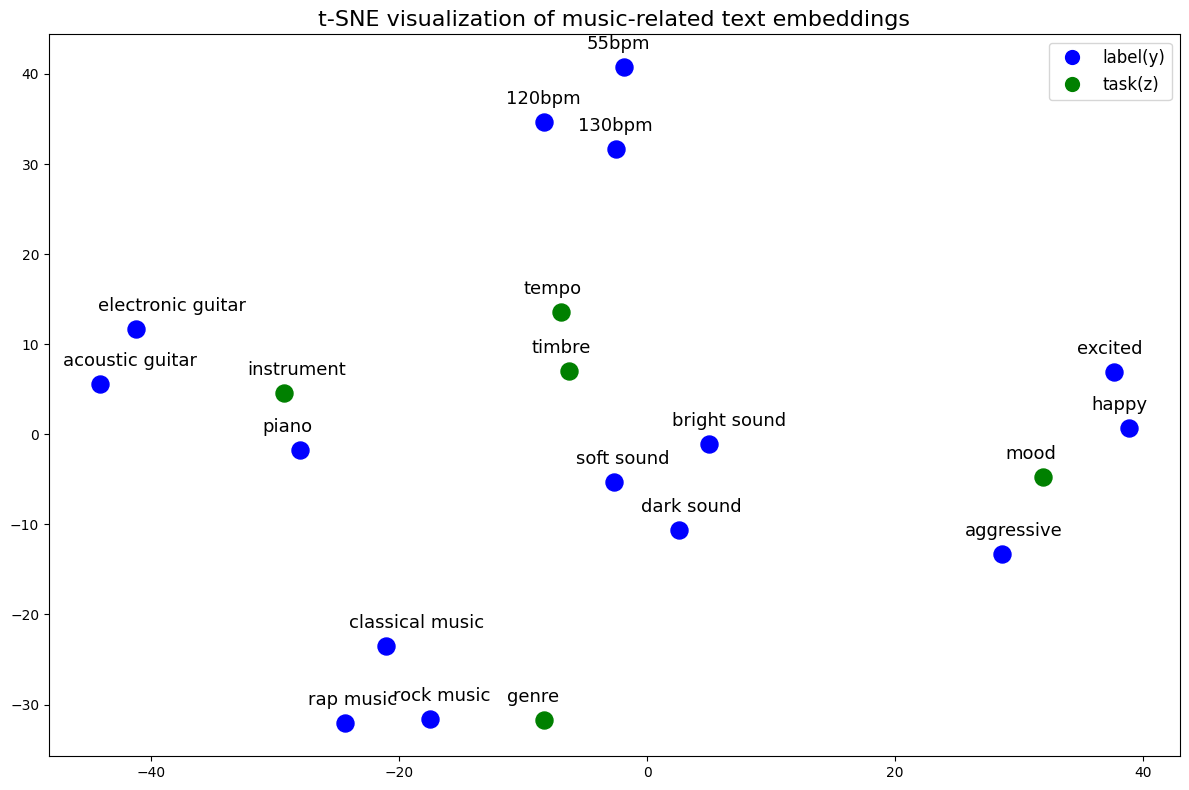

In [17]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)
plt.figure(figsize=(12, 8)) 
colors = {'label(y)': 'blue', 'task(z)': 'green'}
for i, text in enumerate(y + z):
    color = colors['label(y)'] if i < len(y) else colors['task(z)']
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=color, s=150)  
    plt.annotate(text, (embeddings_2d[i, 0] - 3, embeddings_2d[i, 1] + 2), fontsize=13) 
plt.title("t-SNE visualization of music-related text embeddings", fontsize=16) 
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=color, markersize=12) for cat, color in colors.items()], fontsize=12) 
plt.tight_layout()  
plt.show()

## 2. 自然语言是（弱但可扩展的）表示学习监督信号

虽然这不在本教程的范围内（本教程聚焦于标注、检索和生成任务），但音乐-语言模型可以通过使用高层语义信息作为监督信号，成为强大的表示学习器。在含噪但可扩展的音乐-文本对上训练的模型，在下游任务上可以表现出色。例如，在视觉领域，CLIP (Contrastive Language-Image Pre-training) {cite}`radford2021learning` 和 CoCa (Contrastive Captioners are Image-Text Foundation Models) {cite}`yu2022coca` 等模型在多个下游任务上报告了优异的性能。在音乐领域，MuLaP {cite}`manco2022learning`、TTMR {cite}`doh2023toward` 和 MuLan {cite}`huang2022mulan` 的论文表明，音乐-语言模型可以成为强大的表示学习器。


```{figure} ./img/representation.png
---
name: representation
---
```


此外，许多人尝试"对着建筑跳舞"（即用语言描述音乐）。实际上，大量的音乐元数据、评论、社交标签、从高层到低层的属性描述、歌词等，都以自然语言数据的形式存在。我们将在数据集章节中详细介绍这些内容。另外，我们还可以使用其他预训练 MIR 模型推断出的标签作为伪标签 {cite}`gardner2023llark`。与自监督学习相比，这可以被视为一种较弱但仍然可扩展的监督形式。

```{note}
["Writing about music is like dancing about architecture"](https://en.wikipedia.org/wiki/Writing_about_music_is_like_dancing_about_architecture)（用文字描述音乐就像对着建筑跳舞）这句话常被用来形容用语言表达音乐的困难。
```

## 3. 自然语言是对人类友好的交互界面

语言是 AI 模型（如 ChatGPT 和 Stable Diffusion）的有效交互界面，因为它利用了自然、直观的沟通方式。语言使用户能够以灵活且富有上下文的方式表达复杂的查询、请求或想法，而无需具备专业知识。在响应方面，语言还能使系统生成类似人类意图的回答，这对用户满意度和可用性都有积极影响。


```{figure} ./img/prompt_product.png
---
name: prompt_product
---
```